In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as pe
from adjustText import adjust_text
import matplotlib.image as image

In [2]:
df = pd.read_csv('MU vs LEI.csv',encoding = "ISO-8859-1")
df

,Player,#,Pos,Press,Succ,Presspercentage,TKLI,Clr,Team
0,Bruno Fernandes,18,FW,10,4,40.0,1,3,MU
1,Jadon Sancho,25,AM,14,3,21.4,0,0,MU
2,Paul Pogba,6,AM,18,3,16.7,2,1,MU
3,Nemanja Mati?,31,MF,7,4,57.1,1,0,MU
4,Anthony Elanga,36,AM,23,4,17.4,1,0,MU
5,Fred,17,DM,29,4,13.8,3,0,MU
6,Scott McTominay,39,DM,13,2,15.4,2,0,MU
7,Marcus Rashford,10,"FW,MF",2,0,0.0,0,0,MU
8,Luke Shaw,23,LB,5,2,40.0,0,0,MU
9,Alex Telles,27,DF,6,1,16.7,1,0,MU


In [3]:
x_mean = np.mean(df['Presspercentage'])
y_mean = np.mean(df['TKLI'])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


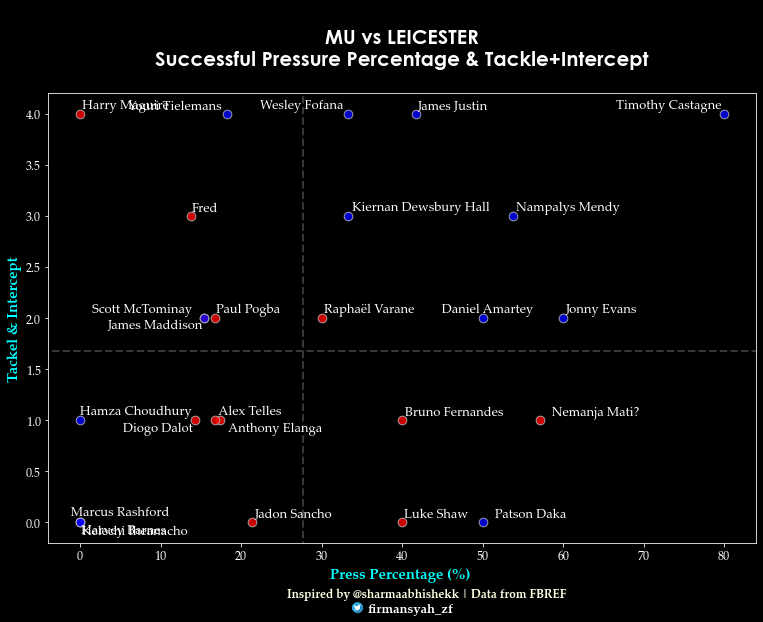

posx and posy should be finite values
posx and posy should be finite values


In [22]:
line_color = "silver"
marker_color = "red"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Palatino Linotype' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 

    for x in range(len(df['Presspercentage'])):
        if df['Team'][x]=='MU':    
            ax.scatter(df["Presspercentage"][x], df["TKLI"][x], s=75, zorder=100, 
                       ec=line_color, fc='red', alpha=0.8) ##scatter points
        if df['Team'][x]=='LEI':    
            ax.scatter(df["Presspercentage"][x], df["TKLI"][x], s=75, zorder=100, 
                       ec=line_color, fc='blue', alpha=0.8) ##scatter points       
#     ax.fill([24, 29, 29, 24], [0, 0, 1400, 1400], color='lightgreen',
#             alpha=0.3, zorder=2) ##the peak age shaded region
#     ax.text(26.5, 850, "PEAK", color=line_color, zorder=3, 
#             alpha=0.2, fontsize=40, ha='center',
#             va='center', fontweight='bold') ## `PEAK` age text


    
    texts = [] ##plot player names
    for row in df.itertuples():
        texts.append(ax.text(row.Presspercentage, row.TKLI, row.Player, fontsize=13, ha='center', va='center', zorder=100))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Press Percentage (%) ", ylabel="Tackel & Intercept") ## set labels and limits ylim=(-5, 105),
    
    ##grids and spines
    plt.axhline(y=y_mean, xmin =-100, xmax=100, color='xkcd:dark grey', linestyle='--', linewidth=2)
    plt.axvline(x=x_mean, ymin=-100,ymax=100, color='xkcd:dark grey', linestyle = '--', linewidth=2, zorder=0.2)
#     ax.grid(color=line_color, linestyle='--', linewidth=0.8, alpha=0.3)   
#     for spine in ["top", "right"]:
#         ax.spines[spine].set_visible(False)
#         ax.spines[spine].set_color(line_color)

        
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#     ax.xaxis.set_ticks(range(16, 42, 3)) ##fix the tick frequency
    ax.tick_params(axis='both', labelsize=12)
    ax.xaxis.label.set(fontsize=15, fontweight='bold',color='xkcd:cyan')
    ax.yaxis.label.set(fontsize=15, fontweight='bold',color='xkcd:cyan') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## title and subtitle
#     fig.text(x=0.35, y=0.92, s="Persis Solo | Squad Age Profile", 
#             ha='left', fontsize=24, fontweight='bold', 
#             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
#                        pe.Normal()]) 
#     fig.text(x=0.35, y=0.88, s="Liga 2 2021", ha='left', 
#             fontsize=18, fontweight='bold', 
#             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
#                        pe.Normal()])
    ax.set_title("\nMU vs LEICESTER\nSuccessful Pressure Percentage & Tackle+Intercept\n", color='xkcd:white', size=20,  weight='heavy', family='Century Gothic')
    
    
    
    
    fig.text(0.68, -0.015, '\nInspired by @sharmaabhishekk | Data from FBREF', \
        horizontalalignment='right', color='xkcd:off white', size=12, weight='heavy') #verticalalignment='top',
    
    ax2 = fig.add_axes([0.425,-0.045,0.025,0.025])
    ax2.axis('off')
    img = plt.imread('img/twitter.png')
    ax2.imshow(img)
    fig.text(0.45,-0.040,'firmansyah_zf', size=13, weight='bold', color='white')
plt.show()
fig.savefig("persis-squad-age-profile", dpi=180)   